In [2]:
import tensorflow as tf
from tensorflow import keras

In [58]:
import random
import math

def is_prime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

def generate_primes(limit):
    primes = [2, 3]
    for num in range(5, limit, 6):
        if is_prime(num):
            primes.append(num)
        if is_prime(num + 2):
            primes.append(num + 2)
    return primes

limit = 3000
prime_list = generate_primes(limit)

# Find the number of the mod-p solutions to the equation y^2 = x^3 + ax + b
def count_solutions_elliptic_curve(a, b, p):
    count = 0
    for x in range(p):
        rhs = (x**3 + a*x + b) % p
        for y in range(p):
            lhs = (y**2) % p
            if lhs == rhs:
                count += 1
    return count


Data1 = []
for prime in prime_list:
    sols = count_solutions_elliptic_curve(-1, 0, prime)
    error = (prime + 1 - sols) / (2 * pow(prime, (1/2)))
    Data1.append([prime, sols, error])


In [68]:
print(Data1)

[[2, 2, 0.35355339059327373], [3, 3, 0.2886751345948129], [5, 7, -0.22360679774997896], [7, 7, 0.1889822365046136], [11, 11, 0.15075567228888181], [13, 7, 0.9707253433941511], [17, 15, 0.36380343755449945], [19, 19, 0.11470786693528087], [23, 23, 0.10425720702853739], [29, 39, -0.8356290217967335], [31, 31, 0.08980265101338746], [37, 39, -0.08219949365267865], [41, 31, 0.8589556903873333], [43, 43, 0.07624928516630233], [47, 47, 0.07293249574894728], [53, 39, 1.0302042296151677], [59, 59, 0.06509445549041194], [61, 71, -0.5761659596980319], [67, 67, 0.06108472217815261], [71, 71, 0.05933908290969266], [73, 79, -0.2926028679903264], [79, 79, 0.0562543950463012], [83, 83, 0.05488212999484517], [89, 79, 0.5829988340034981], [97, 79, 0.9645788568769381], [101, 103, -0.04975185951049946], [103, 103, 0.04926646390821466], [107, 107, 0.04833682445228318], [109, 103, 0.33523919982740297], [113, 127, -0.6114685644493382], [127, 127, 0.04436782547080569], [131, 131, 0.0436852028330519], [137, 15

4/4 [==============================] - 0s 503us/step


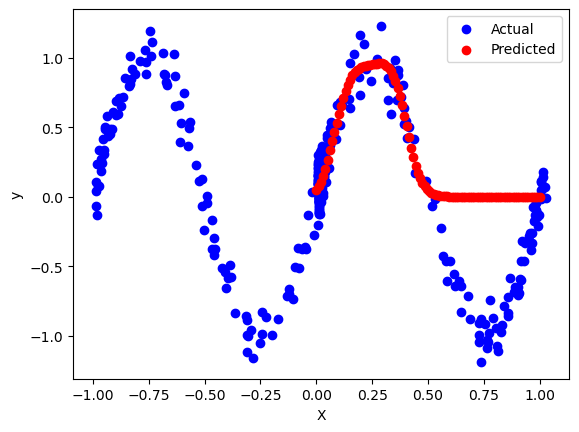

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X = np.array([error for prime, sols, error in Data1])

y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, len(X))

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

model.fit(X, y, epochs=100, batch_size=16, verbose=0)

X_test = np.linspace(0, 1, 100)
y_pred = model.predict(X_test)

plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [177]:
import math

pairs = []

num_pairs = 5000

left = 0.0
right = math.pi

for _ in range(num_pairs):
    l = random.uniform(left, right)
    r = random.uniform(l, right)
    pairs.append((l, r))
    

Data1_angle = []
for prime, sols, error in Data1:
    if error < -1:
        error = -1
    if error > 1:
        error = 1
    angle = math.acos(error)
    Data1_angle.append((prime, sols, error, angle))
    
def count_prime_with_bounded_error(l, r):
    count = 0
    for prime, sols, error, angle in Data1_angle:        
        if l <= angle <= r:
            count += 1
    return count

In [178]:
print(count_prime_with_bounded_error(0, math.pi))

431


In [179]:
print(len(prime_list))

431


In [180]:
new_Data1 = []
for l, r in pairs:
    e = math.sin(l) * math.cos(l) - math.sin(r) * math.cos(r)
    new_Data1.append((l, r, e, r-l, r - l + e, count_prime_with_bounded_error(l, r)/len(prime_list)))
    
import pandas as pd

columns = ["Left", 'Right', 'Tri', 'Dif', 'Tot', 'Target']

df = pd.DataFrame(new_Data1, columns=columns)

print(df)

          Left     Right       Tri       Dif       Tot    Target
0     0.226889  1.859369  0.491999  1.632481  2.124479  0.761021
1     1.992909  2.719710 -0.000153  0.726800  0.726647  0.116009
2     2.845068  3.118401 -0.256262  0.273332  0.017070  0.027842
3     0.741214  2.470937  0.984941  1.729723  2.714664  0.784223
4     2.082573  2.675144 -0.025307  0.592571  0.567264  0.088167
...        ...       ...       ...       ...       ...       ...
4995  0.640355  1.514734  0.423165  0.874379  1.297544  0.167053
4996  2.981998  3.077315 -0.092798  0.095317  0.002519  0.002320
4997  1.874539  2.232973  0.199490  0.358433  0.557924  0.071926
4998  2.515795  2.583802 -0.025660  0.068007  0.042347  0.013921
4999  2.622229  2.866609 -0.169550  0.244380  0.074830  0.044084

[5000 rows x 6 columns]


In [181]:
df.describe()

,Left,Right,Tri,Dif,Tot,Target
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.572876,2.357583,0.191752,0.784707,9.764583e-01,0.299108
std,0.911950,0.695439,0.375473,0.695431,9.785960e-01,0.330082
min,0.000337,0.042513,-0.495904,0.000057,2.048185e-13,0.000000
25%,0.787046,1.938596,-0.090304,0.211620,1.068440e-01,0.034803
50%,1.572812,2.564534,0.077063,0.574807,6.209585e-01,0.104408
75%,2.358417,2.931680,0.500553,1.191653,1.695817e+00,0.672854
max,3.141525,3.141583,0.999916,3.095127,3.141565e+00,0.976798


Mean Squared Error: 0.013557833702848887


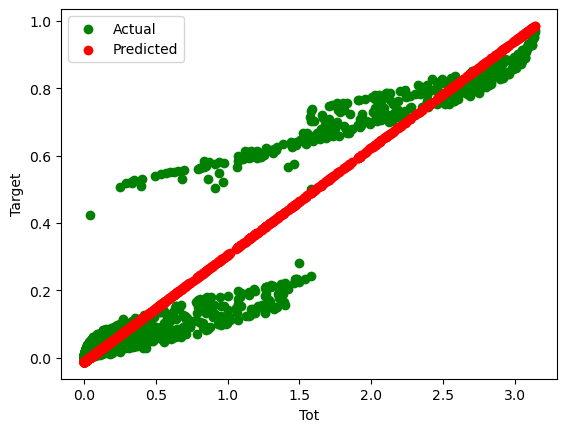

In [182]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = df[['Tot']]  
y = df['Target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Tot')
plt.ylabel('Target')
plt.legend()
plt.show()


Mean Squared Error: 0.027235932208720476


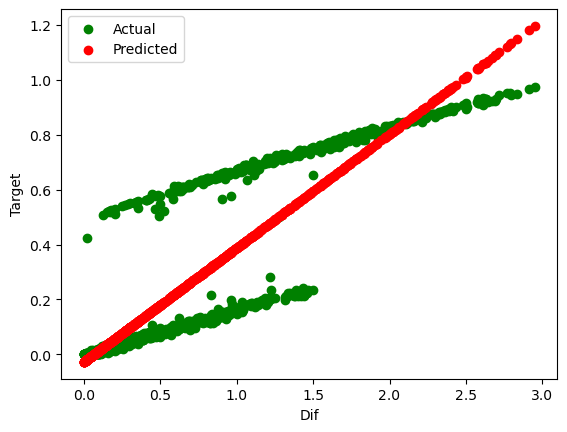

In [183]:
X = df[['Dif']]  
y = df['Target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Dif')
plt.ylabel('Target')
plt.legend()
plt.show()

Mean Squared Error: 0.01263344446146662


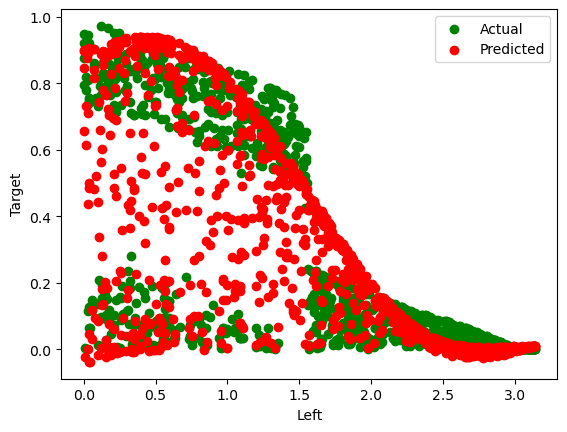

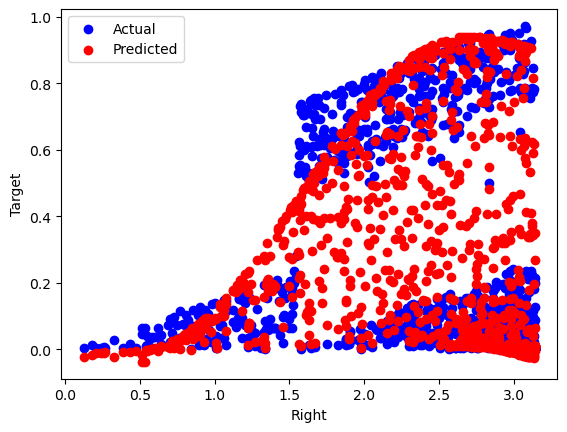

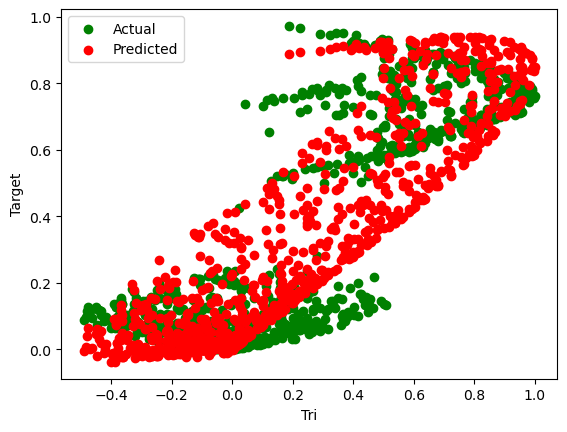

In [184]:
X = df[['Left', 'Right', 'Tri']]  
y = df['Target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(X_test['Left'], y_test, color='green', label='Actual')
plt.scatter(X_test['Left'], y_pred, color='red', label='Predicted')
plt.xlabel('Left')
plt.ylabel('Target')
plt.legend()
plt.show()

plt.scatter(X_test['Right'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Right'], y_pred, color='red', label='Predicted')
plt.xlabel('Right')
plt.ylabel('Target')
plt.legend()
plt.show()

plt.scatter(X_test['Tri'], y_test, color='green', label='Actual')
plt.scatter(X_test['Tri'], y_pred, color='red', label='Predicted')
plt.xlabel('Tri')
plt.ylabel('Target')
plt.legend()
plt.show()

In [185]:
# Find the number of the mod-p solutions to the hyperelliptic equation y^2 = x^a - 1
def count_solutions_hyperelliptic_curve(a, p):
    count = 0
    for x in range(p):
        rhs = (x**a - 1) % p
        for y in range(p):
            lhs = (y**2) % p
            if lhs == rhs:
                count += 1
    return count

4/4 [==============================] - 0s 515us/step


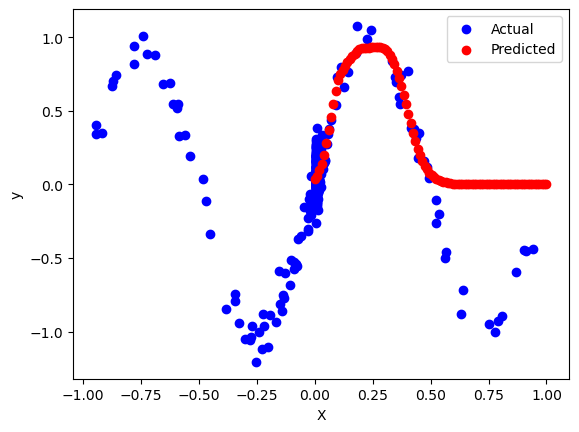

In [167]:
power = 5
degree = (power - 1) // 2

Data3 = []
for prime in prime_list:
    sols = count_solutions_hyperelliptic_curve(power, prime)
    error = (prime + 1 - sols) / (2 * degree * pow(prime, (1/2)))
    Data3.append((prime, sols, error))
    
X = np.array([error for prime, sols, error in Data3])

y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, len(X))

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

model.fit(X, y, epochs=100, batch_size=16, verbose=0)

X_test = np.linspace(0, 1, 100)
y_pred = model.predict(X_test)

plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [186]:
Data3_angle = []
for prime, sols, error in Data3:
    if error < -1:
        error = -1
    if error > 1:
        error = 1
    angle = math.acos(error)
    Data3_angle.append((prime, sols, error, angle))
    
new_Data3 = []
for l, r in pairs:
    new_Data3.append((l, r, r - l, count_prime_with_bounded_error(l, r)/len(prime_list)))
    
columns = ["Left", 'Right', 'Dif', 'Target']

df = pd.DataFrame(new_Data3, columns=columns)

print(df)

          Left     Right       Dif    Target
0     0.226889  1.859369  1.632481  0.761021
1     1.992909  2.719710  0.726800  0.116009
2     2.845068  3.118401  0.273332  0.027842
3     0.741214  2.470937  1.729723  0.784223
4     2.082573  2.675144  0.592571  0.088167
...        ...       ...       ...       ...
4995  0.640355  1.514734  0.874379  0.167053
4996  2.981998  3.077315  0.095317  0.002320
4997  1.874539  2.232973  0.358433  0.071926
4998  2.515795  2.583802  0.068007  0.013921
4999  2.622229  2.866609  0.244380  0.044084

[5000 rows x 4 columns]


In [187]:
df.describe()

,Left,Right,Dif,Target
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.572876,2.357583,0.784707,0.299108
std,0.911950,0.695439,0.695431,0.330082
min,0.000337,0.042513,0.000057,0.000000
25%,0.787046,1.938596,0.211620,0.034803
50%,1.572812,2.564534,0.574807,0.104408
75%,2.358417,2.931680,1.191653,0.672854
max,3.141525,3.141583,3.095127,0.976798


Mean Squared Error: 0.026239608834187054


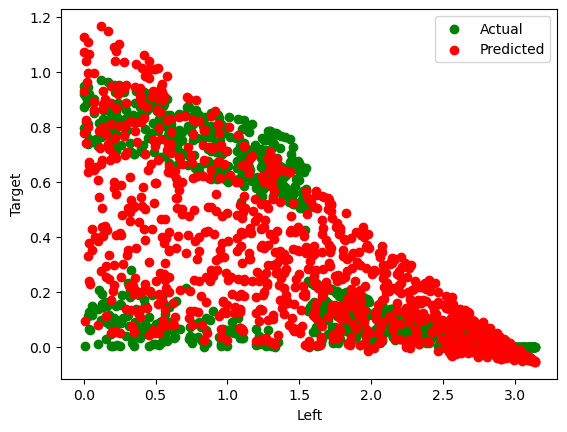

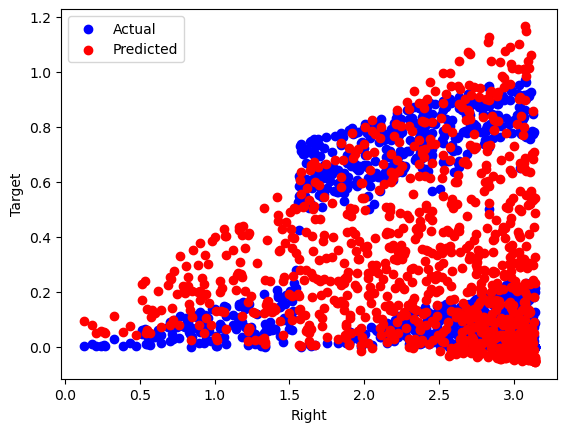

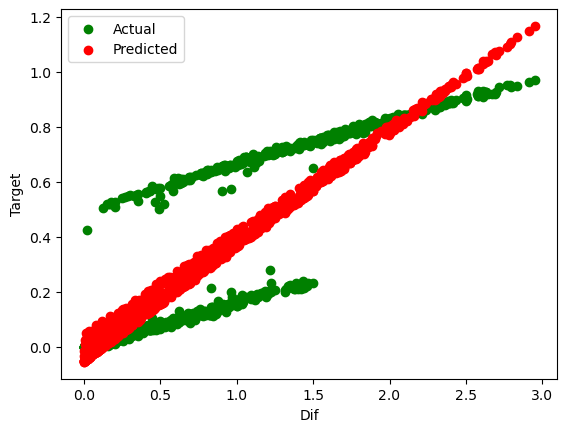

In [188]:
X = df[['Left', 'Right', 'Dif']]  
y = df['Target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(X_test['Left'], y_test, color='green', label='Actual')
plt.scatter(X_test['Left'], y_pred, color='red', label='Predicted')
plt.xlabel('Left')
plt.ylabel('Target')
plt.legend()
plt.show()

plt.scatter(X_test['Right'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Right'], y_pred, color='red', label='Predicted')
plt.xlabel('Right')
plt.ylabel('Target')
plt.legend()
plt.show()

plt.scatter(X_test['Dif'], y_test, color='green', label='Actual')
plt.scatter(X_test['Dif'], y_pred, color='red', label='Predicted')
plt.xlabel('Dif')
plt.ylabel('Target')
plt.legend()
plt.show()